In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [2]:
mushrooms=pd.read_csv('/content/mushroom.csv')

In [3]:
mushrooms.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
mushroom=mushrooms[['stalk_height','cap_diameter']]

In [6]:
mushrooms.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
mushrooms1=mushrooms.iloc[:,0:24].apply(le.fit_transform)


In [9]:
mushrooms1

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,889,4,2,7,0,1,1,2,0,7,...,3,8,0,0,2,6,3,1,5,1
1,786,4,0,6,0,1,3,1,1,3,...,2,0,1,0,2,6,1,2,5,0
2,246,3,1,5,1,4,1,1,0,8,...,8,3,1,3,2,6,6,0,5,1
3,221,0,2,4,1,3,3,0,0,6,...,8,5,0,3,2,0,4,1,0,1
4,630,3,3,8,1,5,2,1,1,6,...,3,7,1,2,0,4,8,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656,4,2,0,1,4,0,1,1,3,...,5,4,0,1,1,2,6,0,1,1
1996,885,4,2,5,1,5,0,2,1,9,...,5,4,0,2,1,7,8,2,5,1
1997,205,2,1,3,1,3,3,0,1,7,...,0,6,0,0,2,1,8,0,6,1
1998,329,0,3,7,0,7,2,0,1,6,...,3,5,1,3,1,0,1,5,6,1


In [10]:
mushrooms1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                2000 non-null   int64
 1   cap_shape                 2000 non-null   int64
 2   cap_surface               2000 non-null   int64
 3   cap_color                 2000 non-null   int64
 4   bruises                   2000 non-null   int64
 5   odor                      2000 non-null   int64
 6   gill_attachment           2000 non-null   int64
 7   gill_spacing              2000 non-null   int64
 8   gill_size                 2000 non-null   int64
 9   gill_color                2000 non-null   int64
 10  stalk_shape               2000 non-null   int64
 11  stalk_root                2000 non-null   int64
 12  stalk_surface_above_ring  2000 non-null   int64
 13  stalk_surface_below_ring  2000 non-null   int64
 14  stalk_color_above_ring    2000 non-null 

In [11]:
mushrooms2=mushrooms1.join(mushroom)

In [12]:
mushrooms2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   int64  
 2   cap_surface               2000 non-null   int64  
 3   cap_color                 2000 non-null   int64  
 4   bruises                   2000 non-null   int64  
 5   odor                      2000 non-null   int64  
 6   gill_attachment           2000 non-null   int64  
 7   gill_spacing              2000 non-null   int64  
 8   gill_size                 2000 non-null   int64  
 9   gill_color                2000 non-null   int64  
 10  stalk_shape               2000 non-null   int64  
 11  stalk_root                2000 non-null   int64  
 12  stalk_surface_above_ring  2000 non-null   int64  
 13  stalk_surface_below_ring  2000 non-null   int64  
 14  stalk_co

In [13]:
mushrooms2.describe()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,481.087000,2.052500,1.556000,3.862000,0.511500,3.988500,1.561500,1.00650,0.503500,5.348000,...,0.5050,1.455500,0.990500,3.562000,3.905500,2.458000,3.070000,0.700000,8.449118,12.314345
std,284.172024,1.435888,1.114668,2.626672,0.499993,2.542361,1.126433,0.81902,0.500113,3.388752,...,0.5001,1.117875,0.809776,2.294295,2.619351,1.732263,1.971559,0.458372,3.697217,7.048845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,228.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000,...,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,5.291009,5.723521
50%,479.000000,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.00000,1.000000,5.000000,...,1.0000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,8.318596,12.124902
75%,729.250000,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,2.00000,1.000000,8.000000,...,1.0000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,11.781272,18.698605
max,975.000000,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.00000,1.000000,11.000000,...,1.0000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,15.095066,25.000054


In [14]:
mushrooms2.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [15]:
mushrooms2.shape

(2000, 26)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cap_shape'}>,
        <Axes: title={'center': 'cap_surface'}>,
        <Axes: title={'center': 'cap_color'}>,
        <Axes: title={'center': 'bruises'}>],
       [<Axes: title={'center': 'odor'}>,
        <Axes: title={'center': 'gill_attachment'}>,
        <Axes: title={'center': 'gill_spacing'}>,
        <Axes: title={'center': 'gill_size'}>,
        <Axes: title={'center': 'gill_color'}>],
       [<Axes: title={'center': 'stalk_shape'}>,
        <Axes: title={'center': 'stalk_root'}>,
        <Axes: title={'center': 'stalk_surface_above_ring'}>,
        <Axes: title={'center': 'stalk_surface_below_ring'}>,
        <Axes: title={'center': 'stalk_color_above_ring'}>],
       [<Axes: title={'center': 'stalk_color_below_ring'}>,
        <Axes: title={'center': 'veil_type'}>,
        <Axes: title={'center': 'veil_color'}>,
        <Axes: title={'center': 'ring_number'}>,
        <Axes: title={'center': 'rin

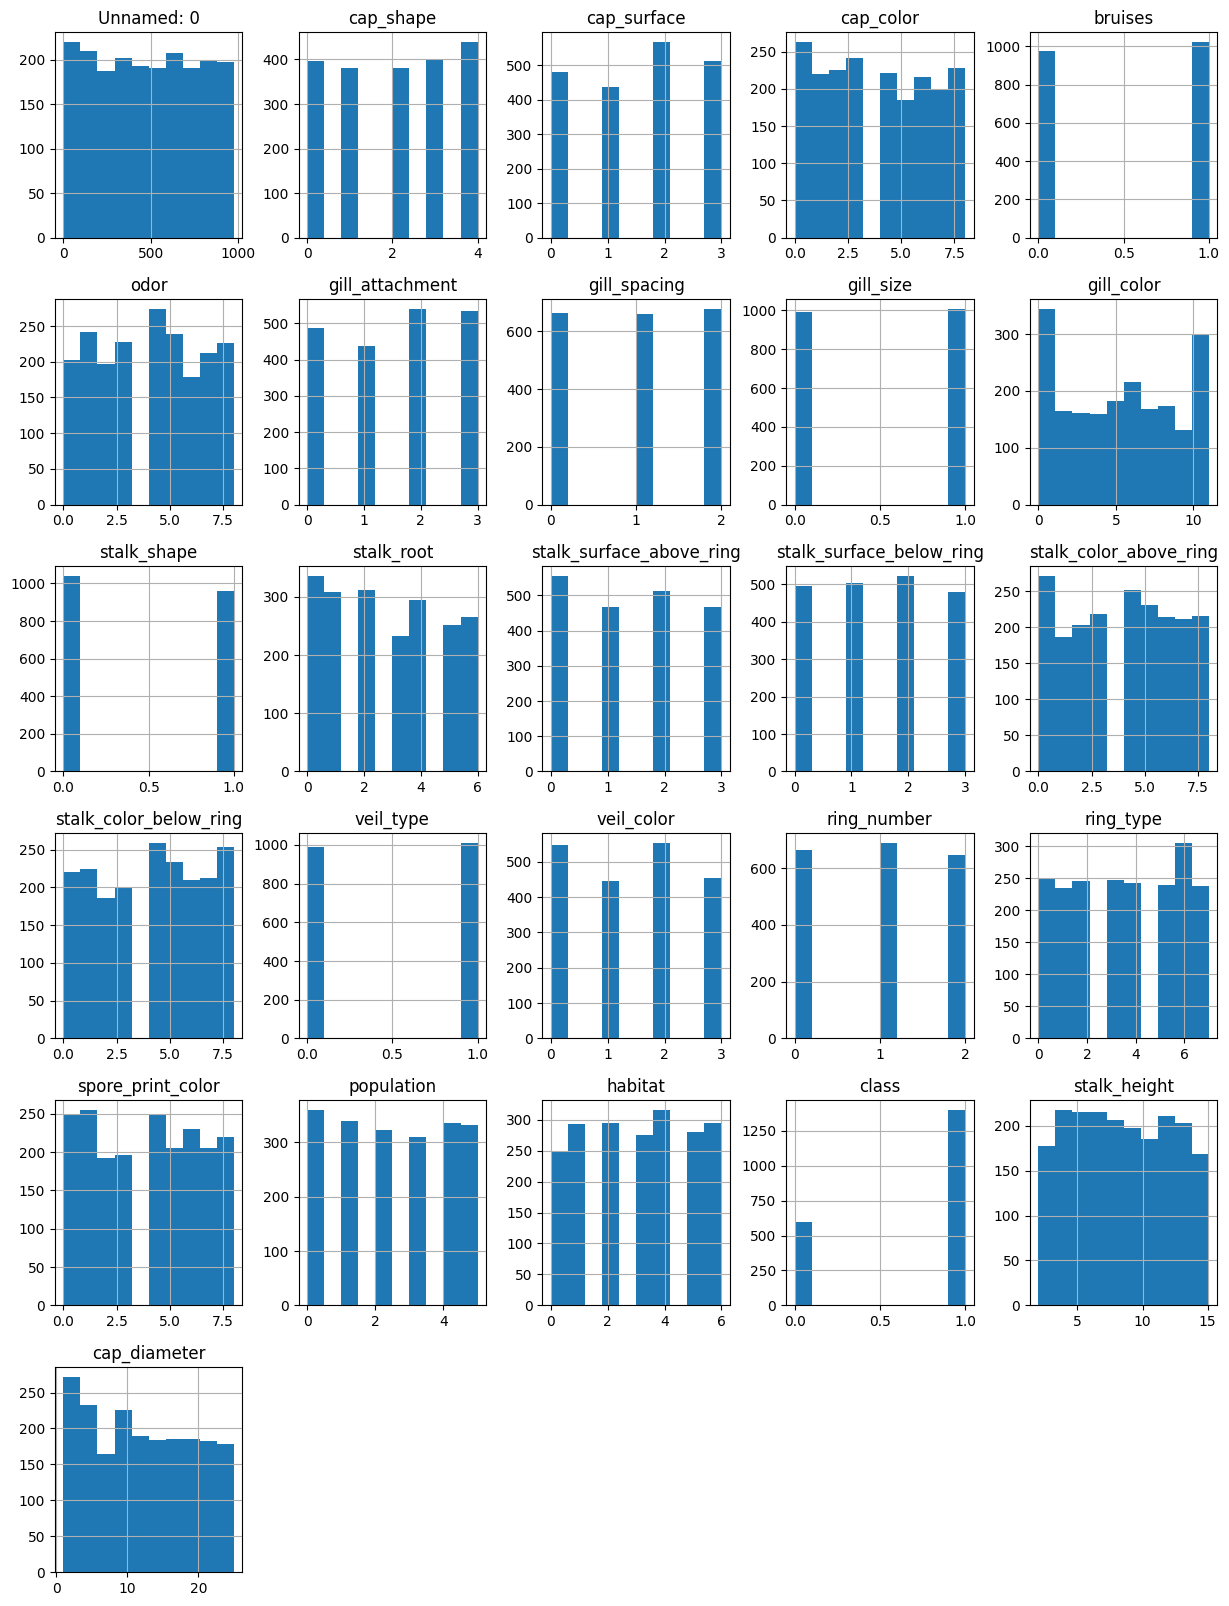

In [16]:
mushrooms2.hist(figsize=(15,20))

In [17]:
mushrooms2.corr()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.075763,-0.018949,0.023832,-0.046098,-0.012166,-0.005352,0.047559,-0.022678,0.038787,...,0.019621,-0.049108,-0.066561,0.022132,-0.002575,0.020003,0.051963,0.005742,-0.000694,0.052912
cap_shape,0.075763,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.024540,0.037743
cap_surface,-0.018949,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043482,0.016606
cap_color,0.023832,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.044086,-0.000489
bruises,-0.046098,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.064644,-0.046946
odor,-0.012166,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.011217,-0.051549
gill_attachment,-0.005352,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.017367,-0.039526
gill_spacing,0.047559,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.016429,0.029169
gill_size,-0.022678,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.003273,-0.068743
gill_color,0.038787,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026179,0.003895


In [18]:
mushrooms2.corr()['class']

,class
Unnamed: 0,0.005742
cap_shape,0.001140
cap_surface,-0.046409
cap_color,-0.078029
bruises,-0.015498
odor,0.039536
gill_attachment,-0.028194
gill_spacing,0.046505
gill_size,0.019858
gill_color,-0.028083


<Axes: title={'center': 'cap_diameter'}, xlabel='class'>

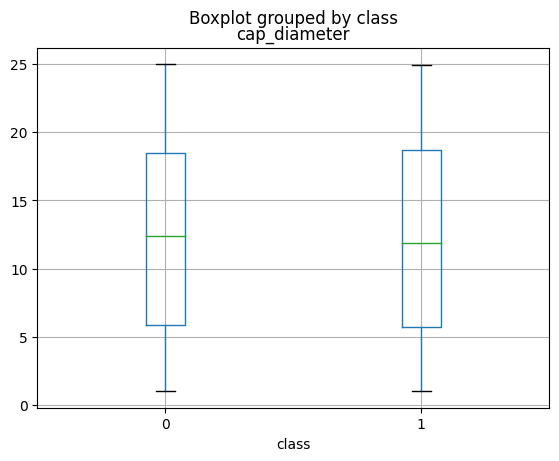

In [19]:
mushrooms2.boxplot(column='cap_diameter',by='class')

<Axes: title={'center': 'stalk_height'}, xlabel='class'>

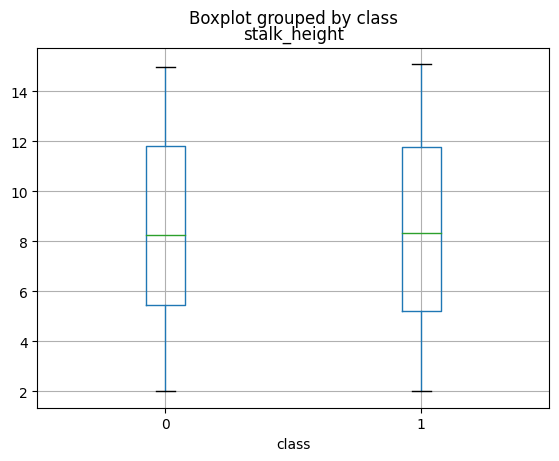

In [20]:
mushrooms2.boxplot(column='stalk_height',by='class')

In [21]:
#split the data into training and testing data sets
x=mushrooms2.drop('class',axis=1)
y=mushrooms2['class']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [23]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1400, 25), (1400,), (600, 25), (600,))

In [24]:
x.corrwith(y)

,0
Unnamed: 0,0.005742
cap_shape,0.001140
cap_surface,-0.046409
cap_color,-0.078029
bruises,-0.015498
odor,0.039536
gill_attachment,-0.028194
gill_spacing,0.046505
gill_size,0.019858
gill_color,-0.028083


Grid search cv

In [25]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [26]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.8485714285714285)

In [27]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 87.33333333333333


array([[ 97,  76],
       [  0, 427]])

In [28]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.56      0.72       173\n           1       0.85      1.00      0.92       427\n\n    accuracy                           0.87       600\n   macro avg       0.92      0.78      0.82       600\nweighted avg       0.89      0.87      0.86       600\n'